In [18]:
import numpy as np 
import cv2

from sklearn.mixture import GaussianMixture as GMM
import torch
import torchvision
from torchvision import datasets, transforms, models
import matplotlib.pyplot as plt
from torch.utils.data import random_split, Sampler, WeightedRandomSampler

from sklearn.decomposition import PCA

import shutil

In [6]:
standard_size = (64,64)
transform = transforms.Compose([
    transforms.ToTensor(),
    transforms.Resize(standard_size),
    transforms.Normalize(mean=[0.485, 0.456, 0.406], std=[0.229, 0.224, 0.225]),
    lambda x: torch.flatten(x)
])

dataset = datasets.ImageFolder("data/GMM_data/resnet_heat/train", transform=transform)
# train_loader = torch.utils.data.DataLoader(train_dataset, batch_size=32)

# train_size = int(0.8 * len(dataset))
# val_size = len(dataset) - train_size
# # Create data loaders
# train_dataset, val_dataset = random_split(dataset, [train_size, val_size])

In [7]:
train_loader = torch.utils.data.DataLoader(dataset, batch_size=16, shuffle=True)
# val_loader = torch.utils.data.DataLoader(val_dataset, batch_size=8, shuffle=False)

In [8]:
def prepare_data(dataloader):
    data = []
    for batch, _ in dataloader:
        data.extend(batch.numpy())
    return np.array(data)

train_data = prepare_data(train_loader)


In [60]:
pca = PCA(n_components=300)  # Adjust the number of components based on your data
reduced_data = pca.fit_transform(train_data)

In [61]:
gmm = GMM(n_components=2, random_state=0, reg_covar=1e-3, covariance_type='tied')

gmm.fit(reduced_data)

GaussianMixture(covariance_type='tied', n_components=2, random_state=0,
                reg_covar=0.001)

In [77]:
import pickle
saved_model = 'GMM.pkl'

pickle.dump(gmm, open(saved_model, 'wb'))

In [16]:
import os
from PIL import Image

def load_images_from_folder(folder):
    images = []
    filenames = []
    for filename in os.listdir(folder):
        img_path = os.path.join(folder, filename)
        try:
            img = Image.open(img_path).convert('RGB') # Convert to RGB for consistency
            images.append(img)
            filenames.append(filename)
        except IOError:
            print(f"Error in loading image: {filename}")
    return images, filenames

# test_images, test_filenames = load_images_from_folder('data/GMM_data/resnet_heat/train/AD')

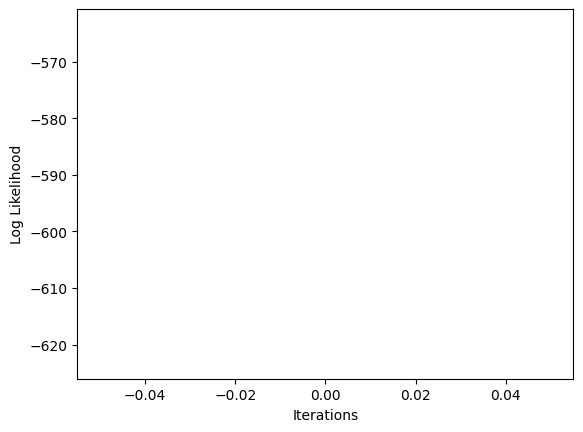

In [74]:
plt.plot(gmm.lower_bound_)
plt.xlabel('Iterations')
plt.ylabel('Log Likelihood')
plt.show()


In [ ]:
# Create label names
label_names = ['Good', 'Bad']

# Assign labels to clusters
cluster_names = [label_names[i] for i in cluster_labels]

In [81]:
import shutil
import os

AD_path = 'data/GMM_data/resnet_heat/train/AD'
AD_path0 = 'data/GMM_data/resnet_heat/AD/0'
AD_path1 = 'data/GMM_data/resnet_heat/AD/1'

MCI_path = 'data/GMM_data/resnet_heat/train/MCI'
MCI_path0 = 'data/GMM_data/resnet_heat/MCI/0'
MCI_path1 = 'data/GMM_data/resnet_heat/MCI/1'

NC_path = 'data/GMM_data/resnet_heat/train/NC'
NC_path0 = 'data/GMM_data/resnet_heat/NC/0'
NC_path1 = 'data/GMM_data/resnet_heat/NC/1'


In [79]:
loaded_model = pickle.load(open(saved_model, 'rb'))

In [86]:
# Assuming test_images is a list of PIL images

test_images_transformed = [transform(img).numpy().flatten() for img in test_images]
test_images_pca = pca.transform(test_images_transformed)
# predictions = gmm.predict(test_images_pca)
predictions = loaded_model.predict(test_images_pca)


# Display the results
for img, filename, cluster in zip(test_images, test_filenames, predictions):
    img_name = os.path.join(AD_path, filename)
    if cluster == 0:
        print(img_name + " 0")
        shutil.copy(img_name, AD_path0)
    elif cluster == 1:
        print(img_name + " 1")
        shutil.copy(img_name, AD_path1)
    
    # print(filename)
    # plt.imshow(img)
    # plt.title(f"{filename} - Cluster: {cluster}")
    # plt.show()
    # break
print('Done')

data/GMM_data/resnet_heat/train/AD/heat_x-101 (14).png 1
data/GMM_data/resnet_heat/train/AD/heat_x-106 (10).png 0
data/GMM_data/resnet_heat/train/AD/heat_x-99 (4).png 1
data/GMM_data/resnet_heat/train/AD/heat_x-111 (6).png 0
data/GMM_data/resnet_heat/train/AD/heat_x-104 (3).png 0
data/GMM_data/resnet_heat/train/AD/heat_x-108 (7).png 0
data/GMM_data/resnet_heat/train/AD/heat_x-129 (9).png 0
data/GMM_data/resnet_heat/train/AD/heat_x-102 (12).png 0
data/GMM_data/resnet_heat/train/AD/heat_x-128 (16).png 1
data/GMM_data/resnet_heat/train/AD/heat_x-115 (6).png 1
data/GMM_data/resnet_heat/train/AD/heat_x-113 (9).png 0
data/GMM_data/resnet_heat/train/AD/heat_x-105 (16).png 0
data/GMM_data/resnet_heat/train/AD/heat_x-111 (7).png 0
data/GMM_data/resnet_heat/train/AD/heat_x-95 (4).png 0
data/GMM_data/resnet_heat/train/AD/heat_x-101 (7).png 0
data/GMM_data/resnet_heat/train/AD/heat_x-111 (12).png 0
data/GMM_data/resnet_heat/train/AD/heat_x-114 (6).png 0
data/GMM_data/resnet_heat/train/AD/heat_x-11

In [88]:
test_images_MCI, test_filenames_MCI = load_images_from_folder('data/GMM_data/resnet_heat/train/MCI')
# Assuming test_images is a list of PIL images

test_images_transformed_MCI = [transform(img).numpy().flatten() for img in test_images_MCI]
test_images_pca_MCI = pca.transform(test_images_transformed_MCI)
# predictions = gmm.predict(test_images_pca)
predictions_MCI = loaded_model.predict(test_images_pca_MCI)

# Display the results
for img, filename, cluster in zip(test_images_MCI, test_filenames_MCI, predictions_MCI):
    img_name = os.path.join(MCI_path, filename)
    if cluster == 0:
        print(img_name + " 0")
        shutil.copy(img_name, MCI_path0)
    elif cluster == 1:
        print(img_name + " 1")
        shutil.copy(img_name, MCI_path1)
    
print('Done')

data/GMM_data/resnet_heat/train/MCI/heat_89x-128.png 1
data/GMM_data/resnet_heat/train/MCI/heat_97x-100.png 0
data/GMM_data/resnet_heat/train/MCI/heat_50x-134.png 0
data/GMM_data/resnet_heat/train/MCI/heat_58x-127.png 0
data/GMM_data/resnet_heat/train/MCI/heat_48x-139.png 1
data/GMM_data/resnet_heat/train/MCI/heat_80x-123.png 1
data/GMM_data/resnet_heat/train/MCI/heat_95x-91.png 0
data/GMM_data/resnet_heat/train/MCI/heat_10x-132.png 0
data/GMM_data/resnet_heat/train/MCI/heat_85x-129.png 0
data/GMM_data/resnet_heat/train/MCI/heat_51x-128.png 0
data/GMM_data/resnet_heat/train/MCI/heat_70x-148.png 0
data/GMM_data/resnet_heat/train/MCI/heat_38x-160.png 1
data/GMM_data/resnet_heat/train/MCI/heat_52x-122.png 0
data/GMM_data/resnet_heat/train/MCI/heat_72x-136.png 1
data/GMM_data/resnet_heat/train/MCI/heat_30x-107.png 0
data/GMM_data/resnet_heat/train/MCI/heat_87x-122.png 0
data/GMM_data/resnet_heat/train/MCI/heat_23x-94.png 0
data/GMM_data/resnet_heat/train/MCI/heat_100x-99.png 0
data/GMM_dat

In [89]:
test_images_NC, test_filenames_NC = load_images_from_folder('data/GMM_data/resnet_heat/train/NC')
# Assuming test_images is a list of PIL images

test_images_transformed_NC = [transform(img).numpy().flatten() for img in test_images_NC]
test_images_pca_NC = pca.transform(test_images_transformed_NC)
# predictions = gmm.predict(test_images_pca)
predictions_NC = loaded_model.predict(test_images_pca_NC)


# Display the results
for img, filename, cluster in zip(test_images_NC, test_filenames_NC, predictions_NC):
    img_name = os.path.join(NC_path, filename)
    if cluster == 0:
        print(img_name + " 0")
        shutil.copy(img_name, NC_path0)
    elif cluster == 1:
        print(img_name + " 1")
        shutil.copy(img_name, NC_path1)
    
print('Done')

data/GMM_data/resnet_heat/train/NC/heat_97x-100.png 0
data/GMM_data/resnet_heat/train/NC/heat_93x-108.png 0
data/GMM_data/resnet_heat/train/NC/heat_44x-124.png 1
data/GMM_data/resnet_heat/train/NC/heat_27x-113.png 1
data/GMM_data/resnet_heat/train/NC/heat_94x-107.png 1
data/GMM_data/resnet_heat/train/NC/heat_80x-123.png 1
data/GMM_data/resnet_heat/train/NC/heat_65x-134.png 1
data/GMM_data/resnet_heat/train/NC/heat_26x-110.png 0
data/GMM_data/resnet_heat/train/NC/heat_92x-102.png 0
data/GMM_data/resnet_heat/train/NC/heat_88x-114.png 1
data/GMM_data/resnet_heat/train/NC/heat_51x-142.png 1
data/GMM_data/resnet_heat/train/NC/heat_80x-125.png 1
data/GMM_data/resnet_heat/train/NC/heat_85x-129.png 1
data/GMM_data/resnet_heat/train/NC/heat_21x-89.png 0
data/GMM_data/resnet_heat/train/NC/heat_4x-123.png 1
data/GMM_data/resnet_heat/train/NC/heat_95x-98.png 0
data/GMM_data/resnet_heat/train/NC/heat_55x-134.png 1
data/GMM_data/resnet_heat/train/NC/heat_62x-141.png 1
data/GMM_data/resnet_heat/train

In [4]:
img = cv2.imread("data/resnet_heat/train/AD/heat_x-87.png")
img2 = img.reshape((-1,3))

In [5]:
gmm_model = GMM(n_components=2, covariance_type='tied').fit(img2)

gmm_labels = gmm_model.predict(img2)

In [6]:
gmm_labels

array([0, 0, 0, ..., 0, 0, 0])

In [9]:
original_shape = img.shape
segmented = gmm_labels.reshape(original_shape[0], original_shape[1])

In [10]:
segmented

array([[0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0],
       ...,
       [0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0]])

In [11]:
cv2.imwrite("segmented.jpg", segmented)

True

# Coronal view

In [22]:
standard_size = (64,64)
transform = transforms.Compose([
    transforms.ToTensor(),
    transforms.Resize(standard_size),
    transforms.Normalize(mean=[0.485, 0.456, 0.406], std=[0.229, 0.224, 0.225]),
    lambda x: torch.flatten(x)
])

dataset_coronal = datasets.ImageFolder("data/GMM_data/resnet_coronal/train", transform=transform)

In [23]:
train_coronal_loader = torch.utils.data.DataLoader(dataset_coronal, batch_size=16, shuffle=True)

In [24]:
train_coronal_data = prepare_data(train_coronal_loader)

In [25]:
pca_coronal = PCA(n_components=3)  # Adjust the number of components based on your data
reduced__coronal_data = pca_coronal.fit_transform(train_coronal_data)

In [26]:
gmm_coronal = GMM(n_components=2, random_state=0, reg_covar=1e-6, covariance_type='tied')

gmm_coronal.fit(reduced__coronal_data)

GaussianMixture(covariance_type='tied', n_components=2, random_state=0)

In [27]:
import pickle
saved_coronal_model = 'GMM_coronal.pkl'

pickle.dump(gmm_coronal, open(saved_coronal_model, 'wb'))

In [28]:
coronal_AD_path = 'data/GMM_data/resnet_coronal/AD'
coronal_AD_path0 = 'data/GMM_data/resnet_coronal/AD0'
coronal_AD_path1 = 'data/GMM_data/resnet_coronal/AD1'

coronal_MCI_path = 'data/GMM_data/resnet_coronal/MCI'
coronal_MCI_path0 = 'data/GMM_data/resnet_coronal/MCI0'
coronal_MCI_path1 = 'data/GMM_data/resnet_coronal/MCI1'

coronal_NC_path = 'data/GMM_data/resnet_coronal/NC'
coronal_NC_path0 = 'data/GMM_data/resnet_coronal/NC0'
coronal_NC_path1 = 'data/GMM_data/resnet_coronal/NC1'

In [29]:
loaded_model_coronal = pickle.load(open(saved_coronal_model, 'rb'))

In [32]:
test_coronal_images, test_coronal_filenames = load_images_from_folder(coronal_NC_path)
# Assuming test_images is a list of PIL images

test_coronal_images_transformed = [transform(img).numpy().flatten() for img in test_coronal_images]
test_coronal_images_pca = pca_coronal.transform(test_coronal_images_transformed)
# predictions = gmm.predict(test_images_pca)
predictions_coronal = loaded_model_coronal.predict(test_coronal_images_pca)

# Display the results
for img, filename,cluster in zip(test_coronal_images,test_coronal_filenames,predictions_coronal):
    img_name = os.path.join(coronal_NC_path, filename)
    if cluster == 0:
        print(img_name + " 0")
        shutil.copy(img_name, coronal_NC_path0)
    elif cluster == 1:
        print(img_name + " 1")
        shutil.copy(img_name, coronal_NC_path1)
    
print('Done')

data/GMM_data/resnet_coronal/NC/heat_27y-139.png 1
data/GMM_data/resnet_coronal/NC/heat_27y-137.png 0
data/GMM_data/resnet_coronal/NC/heat_49y-144.png 0
data/GMM_data/resnet_coronal/NC/heat_96y-110.png 0
data/GMM_data/resnet_coronal/NC/heat_30y-128.png 0
data/GMM_data/resnet_coronal/NC/heat_26y-102.png 0
data/GMM_data/resnet_coronal/NC/heat_29y-137.png 0
data/GMM_data/resnet_coronal/NC/heat_49y-139.png 0
data/GMM_data/resnet_coronal/NC/heat_43y-137.png 1
data/GMM_data/resnet_coronal/NC/heat_84y-146.png 0
data/GMM_data/resnet_coronal/NC/heat_7y-132.png 0
data/GMM_data/resnet_coronal/NC/heat_100y-106.png 0
data/GMM_data/resnet_coronal/NC/heat_3y-130.png 0
data/GMM_data/resnet_coronal/NC/heat_22y-98.png 0
data/GMM_data/resnet_coronal/NC/heat_21y-104.png 0
data/GMM_data/resnet_coronal/NC/heat_63y-123.png 0
data/GMM_data/resnet_coronal/NC/heat_24y-100.png 1
data/GMM_data/resnet_coronal/NC/heat_85y-150.png 0
data/GMM_data/resnet_coronal/NC/heat_89y-104.png 0
data/GMM_data/resnet_coronal/NC/h

# Sagittal View

In [165]:
standard_size = (64,64)
transform = transforms.Compose([
    transforms.ToTensor(),
    transforms.Resize(standard_size),
    transforms.Normalize(mean=[0.485, 0.456, 0.406], std=[0.229, 0.224, 0.225]),
    lambda x: torch.flatten(x)
])

dataset_sagittal = datasets.ImageFolder("data/GMM_data/resnet_heat_sagittal/train", transform=transform)


In [173]:
train_sagittal_loader = torch.utils.data.DataLoader(dataset_sagittal, batch_size=16, shuffle=True)
# val_loader = torch.utils.data.DataLoader(val_dataset, batch_size=8, shuffle=False)
train_sagittal_data = prepare_data(train_sagittal_loader)

pca_sagittal = PCA(n_components=3)  # Adjust the number of components based on your data
reduced_sagittal_data = pca_sagittal.fit_transform(train_sagittal_data)

In [174]:
gmm_sagittal = GMM(n_components=2, random_state=0, reg_covar=1e-6, covariance_type='tied')

gmm_sagittal.fit(reduced_sagittal_data)

GaussianMixture(covariance_type='tied', n_components=2, random_state=0)

In [175]:
import pickle
saved_sagittal_model = 'GMM_sagittal.pkl'

pickle.dump(gmm_sagittal, open(saved_sagittal_model, 'wb'))

In [176]:
sagittal_AD_path = 'data/GMM_data/resnet_heat_sagittal/data_for_case/AD'
sagittal_AD_path0 = 'data/GMM_data/resnet_heat_sagittal/AD0'
sagittal_AD_path1 = 'data/GMM_data/resnet_heat_sagittal/AD1'

sagittal_MCI_path = 'data/GMM_data/resnet_heat_sagittal/data_for_case/MCI'
sagittal_MCI_path0 = 'data/GMM_data/resnet_heat_sagittal/MCI0'
sagittal_MCI_path1 = 'data/GMM_data/resnet_heat_sagittal/MCI1'

sagittal_NC_path = 'data/GMM_data/resnet_heat_sagittal/data_for_case/NC'
sagittal_NC_path0 = 'data/GMM_data/resnet_heat_sagittal/NC0'
sagittal_NC_path1 = 'data/GMM_data/resnet_heat_sagittal/NC1'

In [179]:
loaded_model_sagittal = pickle.load(open(saved_sagittal_model, 'rb'))

test_sagittal_images, test_sagittal_filenames = load_images_from_folder(sagittal_NC_path)
# Assuming test_images is a list of PIL images

test_sagittal_images_transformed = [transform(img).numpy().flatten() for img in test_sagittal_images]
test_sagittal_images_pca = pca_sagittal.transform(test_sagittal_images_transformed)
# predictions = gmm.predict(test_images_pca)
predictions_sagittal = loaded_model_sagittal.predict(test_sagittal_images_pca)

# Display the results
for img, filename,cluster in zip(test_sagittal_images,test_sagittal_filenames,predictions_sagittal):
    img_name = os.path.join(sagittal_NC_path, filename)
    if cluster == 0:
        print(img_name + " 0")
        shutil.copy(img_name, sagittal_NC_path0)
    elif cluster == 1:
        print(img_name + " 1")
        shutil.copy(img_name, sagittal_NC_path1)
    
print('Done')

data/GMM_data/resnet_heat_sagittal/data_for_case/NC/heat_68z-106.png 1
data/GMM_data/resnet_heat_sagittal/data_for_case/NC/heat_77z-105.png 1
data/GMM_data/resnet_heat_sagittal/data_for_case/NC/heat_16z-98.png 1
data/GMM_data/resnet_heat_sagittal/data_for_case/NC/heat_80z-104.png 1
data/GMM_data/resnet_heat_sagittal/data_for_case/NC/heat_29z-98.png 0
data/GMM_data/resnet_heat_sagittal/data_for_case/NC/heat_63z-100.png 1
data/GMM_data/resnet_heat_sagittal/data_for_case/NC/heat_27z-98.png 1
data/GMM_data/resnet_heat_sagittal/data_for_case/NC/heat_59z-99.png 1
data/GMM_data/resnet_heat_sagittal/data_for_case/NC/heat_89z-99.png 0
data/GMM_data/resnet_heat_sagittal/data_for_case/NC/heat_15z-96.png 0
data/GMM_data/resnet_heat_sagittal/data_for_case/NC/heat_76z-104.png 1
data/GMM_data/resnet_heat_sagittal/data_for_case/NC/heat_93z-96.png 0
data/GMM_data/resnet_heat_sagittal/data_for_case/NC/heat_40z-97.png 0
data/GMM_data/resnet_heat_sagittal/data_for_case/NC/heat_96z-94.png 0
data/GMM_data/r